In [1]:
import collections
import sys
import subprocess
import pandas as pd
import os
import numpy as np
import uuid
import tempfile
import bnpy
import scikit_posthocs as sp
import itertools

from scipy.stats import kruskal, f_oneway
from scipy.stats import ttest_ind

sys.path.append('/opt/hydra/')

src = os.environ["HYDRA_SRC"]

import library.analysis as hy

In [2]:
# This cmd was used to identify multimodal genes 
cmd = ["docker" ,
       "run",
       "-v", "$PWD:/data",
       "jpfeil/hydra@sha256:123bee0aa2b3e63084c773a13a16d247076462af910a104cd5776ba5e6d4b29d",
       "filter",
       "-e", "data/TARGET-osteosarcoma-2019-02-02.tsv",
       "--output-dir", "output",
       "--CPU", "13"]

In [3]:
mm_genes = '../target/data/hydra-target-tree-0/MultiModalGenes/'
exp_path = '../target/data/TARGET-OSTEO-TREE-Cluster-0.tsv'

In [4]:
exp = pd.read_csv(exp_path, sep='\t', index_col=0)

In [5]:
res = hy.EnrichmentAnalysis(exp_path=exp_path,
                            mm_path=mm_genes,
                            min_prob_filter=0.1,
                            min_effect_filter=1.0,
                            gmt_path='GO')

In [6]:
res.get_enriched_terms()

,Unnamed: 0,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
0,GO:0006936,GO:0006936,muscle contraction,23/234,211/11450,5.067577e-11,1.432604e-07,1.309035e-07,SCN4B/ACTA1/TNNT3/KCNH2/MYH14/CHRNE/HRC/MYH3/T...,23
1,GO:0042493,GO:0042493,response to drug,20/234,278/11450,1.042682e-06,2.679693e-04,2.448557e-04,SFRP1/ABCA3/KCNH2/EMX2/CA9/FOSB/UQCRFS1/SLC6A2...,20
2,GO:0007156,GO:0007156,homophilic cell adhesion via plasma membrane a...,10/234,72/11450,1.853761e-06,4.367151e-04,3.990464e-04,PCDHGA10/CADM4/CADM2/CADM3/PCDHGB5/DSG2/PCDHGA...,10
3,GO:0007631,GO:0007631,feeding behavior,6/234,37/11450,9.343431e-05,9.108234e-03,8.322606e-03,HAND2/STRA6/NMU/CCK/NTRK2/NEGR1,6


In [7]:
genes = res.get_enriched_term_genes(regex='muscle')

len(genes)

23

In [8]:
clus = hy.MultivariateMixtureModel(data=exp.reindex(genes),
                                   center=True,
                                   gamma=5.0,
                                   variance=2.0,
                                   K=2, 
                                   verbose=True)

centering data


In [9]:
assignments = clus.get_assignments(exp.reindex(genes))

assign = pd.DataFrame(index=exp.columns,
                      columns=[1])

for sample, assignment in zip(exp.columns, assignments):
    assign.loc[sample, 1] = assignment + 1

In [20]:
assign

,1
TARGET-40-0A4HX8-01A-01R,1
TARGET-40-0A4HY5-01A-01R,2
TARGET-40-0A4I0Q-01A-01R,1
TARGET-40-0A4I0W-01A-01R,1
TARGET-40-0A4I3S-01A-01R,1
TARGET-40-0A4I42-01A-01R,1
TARGET-40-0A4I4E-01A-01R,2
TARGET-40-0A4I4O-01A-01R,1
TARGET-40-0A4I65-01A-01R,1
TARGET-40-0A4I6O-01A-01R,1


In [10]:
hclust = hy.HClust(data=exp.reindex(genes))

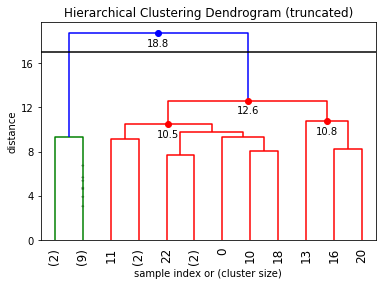

In [11]:
hclust.plot_row_linkage(17)
row_groups = hclust.get_row_groups(17)

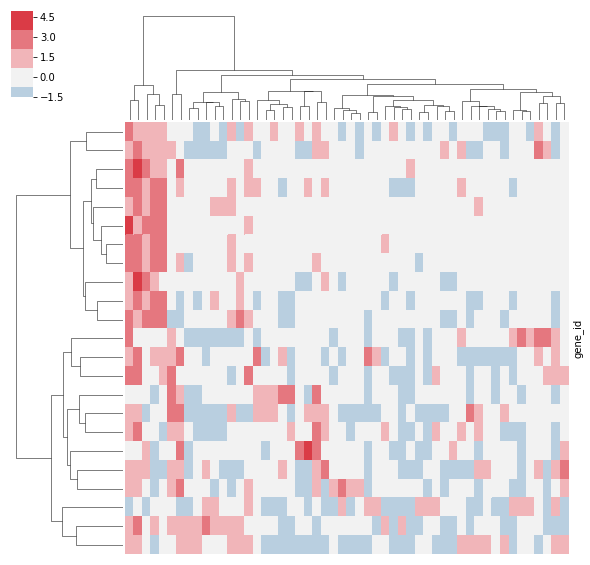

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#col_order = assign.sort_values(1).index.values

g = sns.clustermap(exp.reindex(genes).dropna(),
                   z_score=0,
                   method='ward',
                   center=0,
                   cmap=sns.diverging_palette(240, 10, n=7),
                   figsize=(10, 10))

ax = g.ax_heatmap

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

pth = 'img/expression-heatmap-v2.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

In [14]:
fgseas = {}
for cluster, rows in assign.groupby(1):
    ins = rows.index.values
    outs = [x for x in exp.columns if x not in ins]
    
    r = ttest_ind(exp[ins].values,
                  exp[outs].values,
                  axis=1).statistic
                    
    tstats = pd.DataFrame(index=exp.index, 
                          data=r).dropna()
                          
    tstats = tstats.sort_values(0, ascending=False)
    
    fgseas[cluster] = hy.n1(tstats)

In [15]:
t = fgseas[2]

t[(t['padj'] < 0.05) & (t['ES'] > 0)].sort_values('NES', ascending=False)

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
STRIATED MUSCLE CONTRACTION%WIKIPATHWAYS_20181110%WP383%HOMO SAPIENS,0.000084,0.009339,0.872744,3.464827,0,25,TCAP|ACTA1|NEB|TNNC2|MYL1|TNNI2|TNNT1|DES|ACTC...
ACTIN-MYOSIN FILAMENT SLIDING%GOBP%GO:0033275,0.000086,0.009392,0.880105,3.362186,0,22,TCAP|ACTA1|NEB|TNNC2|MYL1|TNNI2|TNNT1|DES|ACTC...
MUSCLE FILAMENT SLIDING%GOBP%GO:0030049,0.000086,0.009392,0.880105,3.362186,0,22,TCAP|ACTA1|NEB|TNNC2|MYL1|TNNI2|TNNT1|DES|ACTC...
STRIATED MUSCLE CONTRACTION%REACTOME%R-HSA-390522.1,0.000087,0.009433,0.881394,3.267154,0,20,TCAP|NEB|TNNC2|MYL1|TNNI2|TNNT1|DES|ACTN2|MYH3...
MYOFIBRIL ASSEMBLY%GOBP%GO:0030239,0.000084,0.009339,0.811919,3.257541,0,26,TCAP|ACTA1|NEB|KLHL41|TNNT1|ACTC1|ACTN2|MYH3|O...
MUSCLE CONTRACTION%GOBP%GO:0006936,0.000071,0.008927,0.568430,3.180757,0,115,TCAP|ACTA1|NEB|TNNC2|KLHL41|MYL1|TNNI2|TNNT1|D...
CELLULAR COMPONENT ASSEMBLY INVOLVED IN MORPHOGENESIS%GOBP%GO:0010927,0.000080,0.008966,0.699417,3.121235,0,38,TCAP|ACTA1|NEB|KLHL41|TNNT1|ACTC1|ACTN2|MYH3|O...
MUSCULOSKELETAL MOVEMENT%GOBP%GO:0050881,0.000090,0.009648,0.904957,3.069098,0,15,TCAP|TNNC2|TNNI2|TNNT1|STAC3|MYH3|TNNC1|CHRNA1...
MULTICELLULAR ORGANISMAL MOVEMENT%GOBP%GO:0050879,0.000090,0.009648,0.904957,3.069098,0,15,TCAP|TNNC2|TNNI2|TNNT1|STAC3|MYH3|TNNC1|CHRNA1...


In [16]:
pth = 'data/xCell_TARGET-osteosarcoma-2019-02-02_xCell_1553020819.txt'
xcell = pd.read_csv(pth, sep='\t', index_col=0)
xcell.columns = [x.replace('.', '-') for x in xcell.columns]

In [17]:
igroups = dict((group, []) for group in assign[1].unique())
data = pd.DataFrame(columns=['sample', 
                             'cluster', 
                             'source', 
                             'feature', 
                             'value'])

for sample in assign.index.values:
  
    assignment = assign.loc[sample, 1]
    
    if pd.isnull(assignment):
        continue
    
    igroups[assignment].append(sample)
        
    for cell, value in xcell[sample].iteritems():
        data.loc[len(data), :] = [sample, assignment, 'xCell', cell, value]
        
skip = ['P-value', 'Pearson Correlation', 'RMSE']

data = data[~data['feature'].isin(skip)]
        
data['value'] = pd.to_numeric(data['value'])

In [18]:
data

,sample,cluster,source,feature,value
0,TARGET-40-0A4HX8-01A-01R,1,xCell,Adipocytes,0.0060
1,TARGET-40-0A4HX8-01A-01R,1,xCell,Astrocytes,0.0040
2,TARGET-40-0A4HX8-01A-01R,1,xCell,B-cells,0.0000
3,TARGET-40-0A4HX8-01A-01R,1,xCell,Basophils,0.0854
4,TARGET-40-0A4HX8-01A-01R,1,xCell,CD4+ T-cells,0.0000
5,TARGET-40-0A4HX8-01A-01R,1,xCell,CD4+ Tcm,0.0000
6,TARGET-40-0A4HX8-01A-01R,1,xCell,CD4+ Tem,0.0000
7,TARGET-40-0A4HX8-01A-01R,1,xCell,CD4+ memory T-cells,0.0000
8,TARGET-40-0A4HX8-01A-01R,1,xCell,CD4+ naive T-cells,0.0000
9,TARGET-40-0A4HX8-01A-01R,1,xCell,CD8+ T-cells,0.0000


In [19]:
from scipy.stats import kruskal, f_oneway
import collections
import scikit_posthocs as sp
import itertools

sigs = collections.defaultdict(list)

p_values = pd.DataFrame(columns=['source', 
                                 'feature', 
                                 'A', 
                                 'B', 
                                 'holm p-value'])

targets = ['Neutrophils']

for source, rows in data.groupby('source'):
    
    #rows = rows[rows['feature'].isin(targets)]
    
    print(source)
    print()
    nfeatures = len(rows['feature'].unique())
    alpha = 1 - (1 - 0.05) ** (1.0 / nfeatures)
    print(alpha)
    for feature in rows['feature'].unique():
        print(feature)
        groups3 = []
        for i, rows in data[data['feature'] == feature].groupby('cluster'):
            groups3.append(list(rows['value'].values))
    
        try:
            stat, pvalue = kruskal(*groups3)
            print(feature, pvalue, pvalue < alpha)
        
        except:
            continue
    
        if pvalue < alpha:
            sigs[source].append(feature)
            
            res = sp.posthoc_mannwhitney(groups3, 
                                         p_adjust='holm')
            
            for i, j in itertools.combinations(range(len(groups3)),
                                               2):
                
                if i == j:
                    continue 
                    
                p_values.loc[len(p_values), :] = [source,
                                                  feature,
                                                  i, 
                                                  j,
                                                  res[i, j]]

xCell
()
0.000765278582887
Adipocytes
('Adipocytes', 0.8629278160333054, False)
Astrocytes
('Astrocytes', 0.9812188909052268, False)
B-cells
('B-cells', 0.5474070645680185, False)
Basophils
('Basophils', 0.938100497011478, False)
CD4+ T-cells
CD4+ Tcm
('CD4+ Tcm', 0.7124035697251504, False)
CD4+ Tem
('CD4+ Tem', 0.2592860394252278, False)
CD4+ memory T-cells
('CD4+ memory T-cells', 0.20715552811355423, False)
CD4+ naive T-cells
('CD4+ naive T-cells', 0.5645845900544679, False)
CD8+ T-cells
('CD8+ T-cells', 0.44816005628386846, False)
CD8+ Tcm
('CD8+ Tcm', 0.5645845900544679, False)
CD8+ Tem
CD8+ naive T-cells
('CD8+ naive T-cells', 0.05053638674525174, False)
CLP
('CLP', 0.8643415821545357, False)
CMP
('CMP', 0.4252354379058956, False)
Chondrocytes
('Chondrocytes', 0.17948802874950703, False)
Class-switched memory B-cells
('Class-switched memory B-cells', 0.07639450656632697, False)
DC
('DC', 0.322531068761979, False)
Endothelial cells
('Endothelial cells', 0.9256169378146889, False)
E

KeyError: (0, 1)

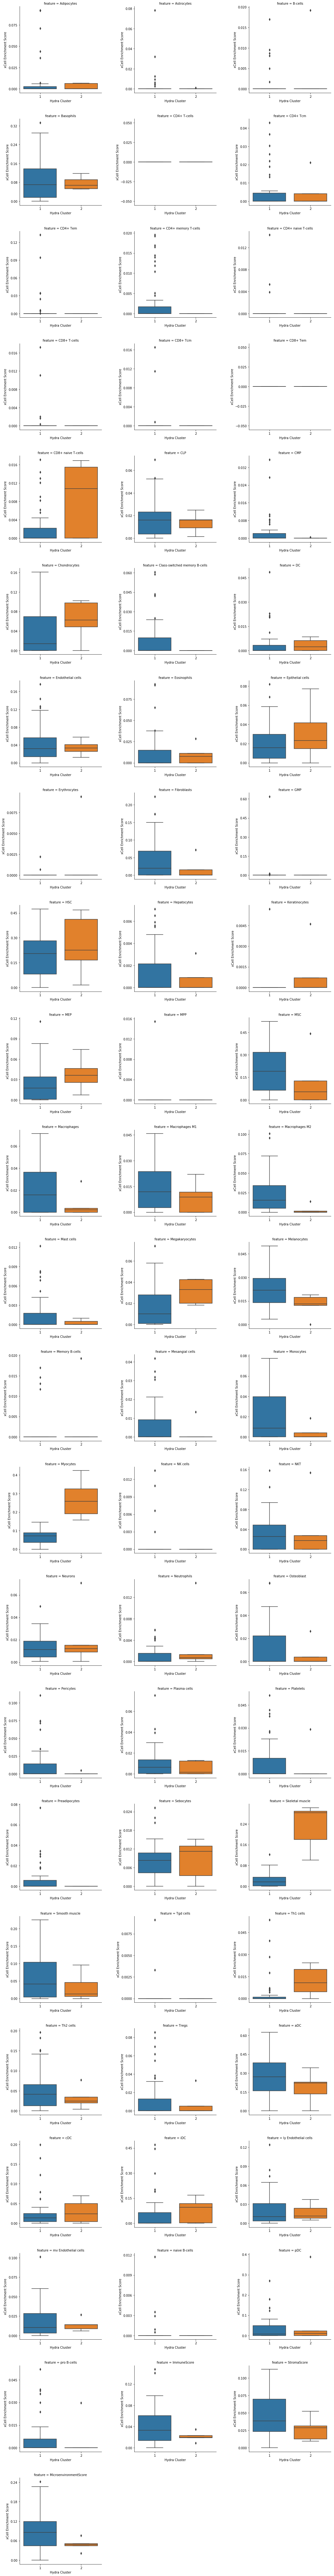

In [21]:
mask = (data['source'] == 'xCell') #& (data['feature'].isin(sigs['xCell']))

t = data[mask]

g = sns.catplot(x='cluster', 
                y='value', 
                col='feature',
                kind='box',
                col_wrap=3,
                sharex=False,
                sharey=False,
                data=t)

for i in range(len(g.axes)):
    g.axes[i].set_xlabel('Hydra Cluster')
    g.axes[i].set_ylabel('xCell Enrichment Score')
    
plt.subplots_adjust(hspace=0.3, wspace=0.4)

/root/miniconda/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/root/miniconda/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


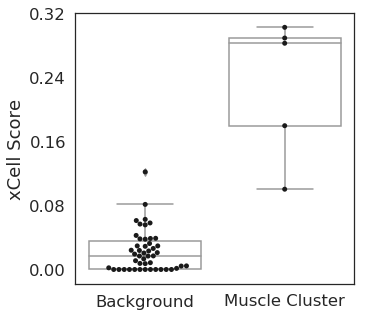

In [22]:
sns.set(style='white', font_scale=1.5)

mask = (data['source'] == 'xCell') & (data['feature'].isin(['Skeletal muscle']))

t = data[mask]

t.loc[t['cluster'].isin([1]), 'merge'] = 'Background'
t.loc[t['cluster'].isin([2]), 'merge'] = 'Muscle Cluster'

fig, ax = plt.subplots(1, 
                       figsize=(5, 5))

g = sns.boxplot(x='merge',
                y='value',
                data=t,
                color='white',
                ax=ax)

sns.swarmplot(x='merge',
              y='value',
              data=t,
              color='k',
              size=5,
              ax=ax)

plt.subplots_adjust(hspace=0.3, wspace=0.4)

g.set_xlabel('')
g.set_ylabel('xCell Score')

pth = 'img/osteo-muscle-xcell-v2.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

pth = 'img/osteo-muscle-xcell-v2.png'
plt.savefig(pth, format='png', bbox_inches='tight')